In [4]:
import pandas as pd
from scipy import sparse
import numpy as np
import re
import gc

In [5]:
from glob import glob

folders = glob("../bds/*")
folders.sort()
folders

['../bds\\0_5000',
 '../bds\\10000_15000',
 '../bds\\15000_25000',
 '../bds\\5000_10000']

In [9]:
samples = []
for folder in folders:
    df = pd.read_parquet(f"{folder}/encoded_data.parquet")
    samples.append(df.sample(75).copy())
    del df
    gc.collect()

sample_df = pd.concat(samples, ignore_index=True)
sample_df.to_parquet(f"300_samples.parquet", index=False, compression="zstd")

In [10]:
sample_df

,id,url,title,created_date,updated_date,content,content_text_raw,content_text_list,content_text
0,4461,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Quyết định 08/2022/QĐ-UBND về tỷ lệ phần trăm ...,25/05/2022,01/08/2022,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n\n ỦY BAN NHÂN DÂN\n...,[ỦY BAN NHÂN DÂN\n \n TỈNH HÀ ...,[Chunk header:\nDocument title: Quyết định 08/...
1,3101,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Quyết định 330/QĐ-UBND năm 2023 về Kế hoạch tổ...,17/02/2023,23/02/2023,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n ỦY BAN NHÂN DÂN\n ...,[ỦY BAN NHÂN DÂN\n \n THÀNH PHỐ ...,[Chunk header:\nDocument title: Quyết định 330...
2,445,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Nghị quyết 20/NQ-HĐND thông qua Danh mục điều ...,19/04/2024,13/07/2024,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n\n HỘI ĐỒNG\r\n NHÂ...,[HỘI ĐỒNG\r\n NHÂN DÂN\n \n\n\n ...,[Chunk header:\nDocument title: Nghị quyết 20/...
3,189,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Nghị quyết 29/NQ-HĐND điều chỉnh danh mục các ...,04/07/2024,06/08/2024,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n HỘI ĐỒNG NHÂN\r\n D...,[HỘI ĐỒNG NHÂN\r\n DÂN\n \n TỈN...,[Chunk header:\nDocument title: Nghị quyết 29/...
4,3077,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Quyết định 11/2023/QĐ-UBND quy định đơn giá câ...,23/02/2023,28/02/2023,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n\n\n ỦY\r\n BAN NH...,[ỦY\r\n BAN NHÂN DÂN\n \n\n\n ...,[Chunk header:\nDocument title: Quyết định 11/...
...,...,...,...,...,...,...,...,...,...
295,8251,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Quyết định 3270/QĐ-UBND về phê duyệt kế hoạch ...,03/08/2019,03/10/2019,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n\n\n ỦY\r\n BAN NH...,[ỦY\r\n BAN NHÂN DÂN\n \n\n\n ...,[Chunk header:\nDocument title: Quyết định 327...
296,5590,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Quyết định 2954/QĐ-UBND năm 2021 phê duyệt quy...,26/11/2021,17/12/2021,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n\n ỦY\r\n BAN NHÂN ...,[ỦY\r\n BAN NHÂN DÂN\n \n\n\n ...,[Chunk header:\nDocument title: Quyết định 295...
297,8594,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Quyết định 12/2019/QĐ-UBND về phân cấp thẩm qu...,13/04/2019,11/06/2019,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n\n\n ỦY\r\n BAN NH...,[ỦY\r\n BAN NHÂN DÂN\n \n\n\n ...,[Chunk header:\nDocument title: Quyết định 12/...
298,5967,https://thuvienphapluat.vn/van-ban/Bat-dong-sa...,Văn bản hợp nhất 04/VBHN-BXD năm 2021 hợp nhất...,26/08/2021,13/09/2021,"b'<div class=""content1"">\n <div>\n <div>\n ...",\n\n\n\n\n\n\n\n\n\n BỘ XÂY DỰNG\n ...,[BỘ XÂY DỰNG\n \n --------\n ...,[Chunk header:\nDocument title: Văn bản hợp nh...


In [15]:
sample_df["content_text_raw"].iloc[0].strip()

'ỦY BAN NHÂN DÂN\n         \n         TỈNH HÀ NAM\n         \n         -------\n        \n\n\n\n\n\n         CỘNG HÒA XÃ HỘI\r\n  CHỦ NGHĨA VIỆT NAM\n         \n         Độc lập - Tự do - Hạnh phúc\n         \n         ---------------\n        \n\n\n\n\n\n\n        Số: 08/2022/QĐ-UBND\n       \n\n\n\n\n         Hà Nam, ngày 25\r\n  tháng 5 năm 2022\n        \n\n\n\n\n\n\n\n\n\n\n\n       QUYẾT ĐỊNH\n      \n\n\n\n     VỀ\r\nTỶ LỆ PHẦN TRĂM (%) ĐIỀU TIẾT NGUỒN THU TIỀN SỬ DỤNG ĐẤT TỪ CÁC VỊ TRÍ ĐẤU GIÁ\r\nQUYỀN SỬ DỤNG ĐẤT CHO NGÂN SÁCH HUYỆN THANH LIÊM ĐỂ TẠO NGUỒN VỐN THỰC HIỆN ĐỀ\r\nÁN XÂY DỰNG TRUNG TÂM HÀNH CHÍNH HUYỆN THANH LIÊM ĐẾN NĂM 2025\n    \n\n\n\n       ỦY BAN NHÂN DÂN TỈNH HÀ NAM\n      \n\n\n\n\n      Căn cứ Luật Tổ chức Chính\r\nquyền địa phương ngày 19 tháng 6 năm 2015;\n     \n\n\n\n      Căn cứ Luật sửa đổi, bổ sung\r\nmột số điều của Luật Tổ chức Chính phủ và\n     \n\n      Luật Tổ chức chính quyền địa\r\nphương ngày 22 tháng 11 năm 2019;\n     \n\n\n\n      Căn cứ

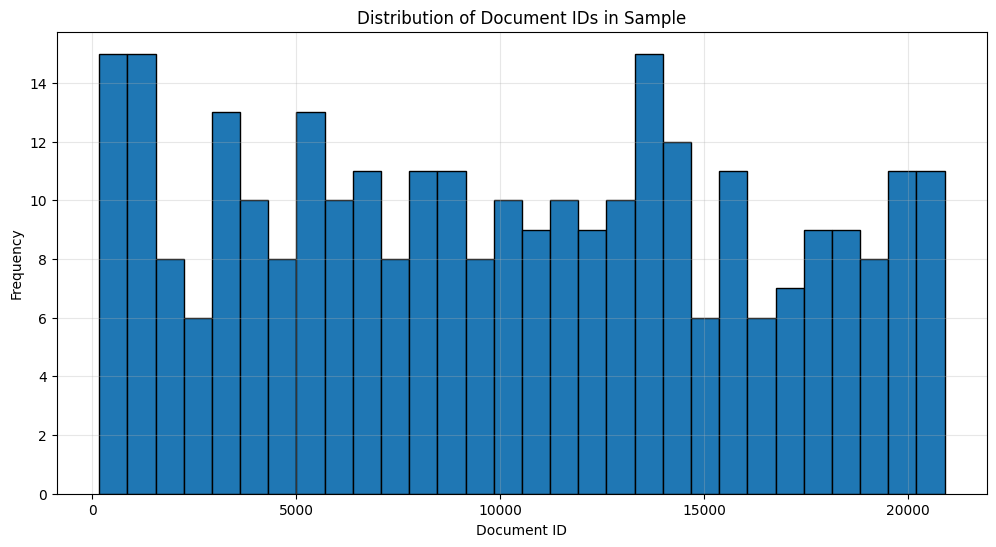

In [16]:
import matplotlib.pyplot as plt

# Draw id distribution
plt.figure(figsize=(12, 6))
sample_df["id"].hist(bins=30, edgecolor="black")
plt.title("Distribution of Document IDs in Sample")
plt.xlabel("Document ID")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()